In [2]:
# set working directory to root
import os
os.chdir('..')
os.getcwd()

'/Users/tonpoppe/workspace/GraphCase'

In [3]:
import networkx as nx
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from GAE.graph_case_controller import GraphAutoEncoder
from GAE.graph_reconstructor import GraphReconstructor
from GAE.input_layer_constructor import InputLayerConstructor
from GAE.position_manager import WaveLetPositionManager
from  GAE.graph_case_tools import Tools
import examples.example_graph_bell_version2 as gb
import math
import pygsp as gsp

2023-09-22 07:53:29.473531: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [42]:
G =  nx.read_gpickle("/Users/tonpoppe/Downloads/graph.pickle")
id = 25
G_ego = nx.ego_graph(G.to_undirected(), id, radius=1)

In [43]:
adj = nx.adjacency_matrix(G_ego)
adj.todense()

matrix([[0. , 0.7, 0. ],
        [0.7, 0. , 0.7],
        [0. , 0.7, 0. ]])

In [59]:
g_gsp = gsp.graphs.Graph(adj)
g_gsp.compute_fourier_basis()
f_wave = gsp.filters.Meyer(g_gsp, Nf=2)
wave_coef = f_wave.localize(1)
wave_coef

array([[ 0.57735004, -0.57735579],
       [ 0.57735288,  1.15468388],
       [ 0.57735004, -0.57735579]])

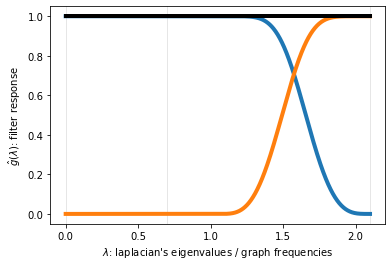

In [46]:
f_wave.plot()

In [38]:
g_gsp.U

array([[-5.77350269e-01, -7.07106781e-01,  4.08248290e-01],
       [-5.77350269e-01, -2.62376926e-16, -8.16496581e-01],
       [-5.77350269e-01,  7.07106781e-01,  4.08248290e-01]])

In [56]:
g_gsp.U.T

array([[-5.77350269e-01, -5.77350269e-01, -5.77350269e-01],
       [-7.07106781e-01, -2.62376926e-16,  7.07106781e-01],
       [ 4.08248290e-01, -8.16496581e-01,  4.08248290e-01]])

In [64]:
x2 = np.multiply(g_gsp.U.T[0,:], g_gsp.U[0,:])
x2

array([ 0.33333333,  0.40824829, -0.23570226])

In [49]:
s = f_wave.evaluate(g_gsp.e)
s

array([[1., 1., 0.],
       [0., 0., 1.]])

In [67]:
g = np.multiply(s[0,:], g_gsp.e)
g

array([0. , 0.7, 0. ])

In [68]:
sum(np.multiply(g, x2))

0.28577380332470387

In [55]:
g_gsp.e

array([0. , 0.7, 2.1])

In [110]:
np.squeeze(np.asarray(np.multiply(f_l, f_l)))

array([0.16666667, 0.5       , 0.33333333])